In [1]:
from gp_2D import *

In [2]:
input_file = '../training_results/2D/train_inputs_all.json'
var_file = '../training_results/2D/train_outputs_var_all.json'
output_file = '../training_results/2D/train_outputs_mean_all.json'
output_type = 'P'


In [3]:
gp = LPI_GP_2D(input_file=input_file, output_file=output_file,\
               output_type=output_type, var_file=var_file, train_frac = 0.001)


In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l1 =  0.21544346900318845 l2 =  2.782559402207126 var =  0.7742636826811278


In [6]:
gp.optimise_GP()

l1 =  3.593813663804626 l2 =  10.0 var =  0.1


In [7]:
N = 1000
Ln_300 = np.ones(N)*300e-6
Ln_500 = np.ones(N)*500e-6
Ln_1000 = np.ones(N)*1000e-6
I = np.geomspace(1e14, 1.1e16, N)
X_300 = []
X_500 = []
X_1000 = []
for i in range(N):
        X_300.append([I[i], Ln_300[i]])
        X_500.append([I[i], Ln_500[i]])
        X_1000.append([I[i], Ln_1000[i]])

X_300 = np.array(X_300)
X_500 = np.array(X_500)
X_1000 = np.array(X_1000)

In [8]:
Y_300, Var_epi_300, Var_noise_300 = gp.GP_predict(X_300, get_var=True)
Y_500, Var_epi_500, Var_noise_500 = gp.GP_predict(X_500, get_var=True)
Y_1000, Var_epi_1000, Var_noise_1000 = gp.GP_predict(X_1000, get_var=True)

In [9]:
err_300 = 2.0*np.sqrt(Var_epi_300 + Var_noise_300)
err_500 = 2.0*np.sqrt(Var_epi_500 + Var_noise_500)
err_1000 = 2.0*np.sqrt(Var_epi_300 + Var_noise_1000)

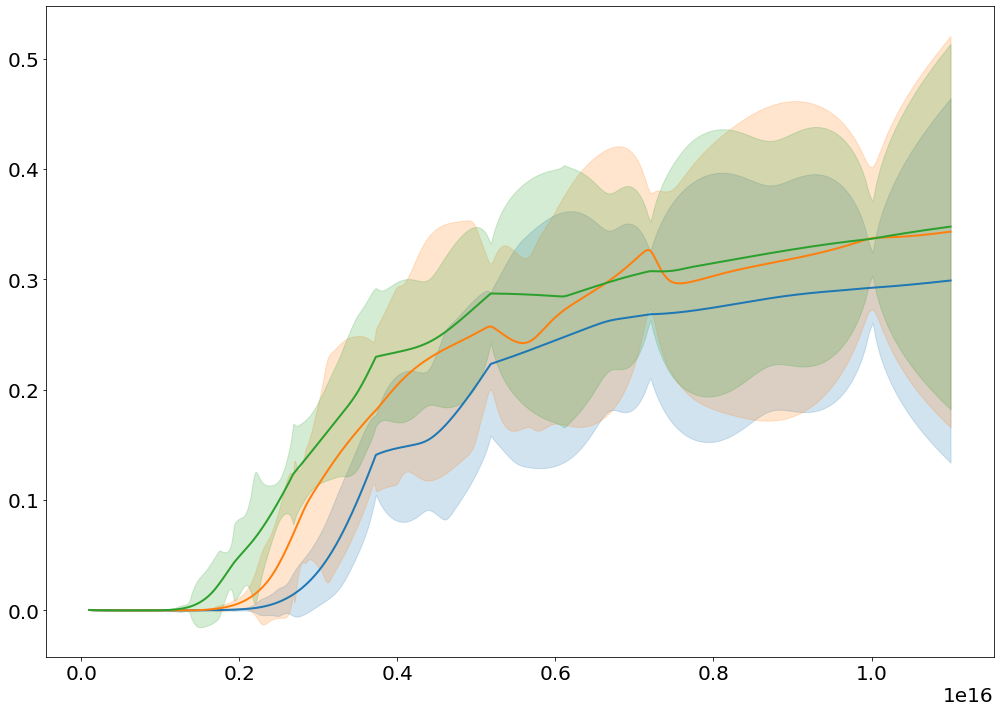

In [10]:
plt.plot(X_300[:,0].flatten(), Y_300.flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten(), color = 'C2')

plt.fill_between(X_300[:,0].flatten(), Y_300-err_300, Y_300+err_300, alpha = 0.2, color = 'C0')
plt.fill_between(X_500[:,0].flatten(), Y_500.flatten()-err_500, Y_500.flatten()+err_500, alpha = 0.2, color = 'C1')
plt.fill_between(X_1000[:,0].flatten(), Y_1000.flatten()-err_1000, Y_1000.flatten()+err_1000, alpha = 0.2, color = 'C2')

In [11]:
print(Y_1000)

[4.21527685e-04 4.20017076e-04 4.18479839e-04 4.16916566e-04
 4.15327987e-04 4.13714955e-04 4.12078435e-04 4.10419492e-04
 4.08739268e-04 4.07038973e-04 4.05319863e-04 4.03583226e-04
 4.01830369e-04 4.00062600e-04 3.98281219e-04 3.96487507e-04
 3.94682717e-04 3.92868067e-04 3.91044732e-04 3.89213844e-04
 3.87376487e-04 3.85533692e-04 3.83686440e-04 3.81835661e-04
 3.79982230e-04 3.78126976e-04 3.76270672e-04 3.74414045e-04
 3.72557775e-04 3.70702493e-04 3.68848787e-04 3.66997201e-04
 3.65148236e-04 3.63302352e-04 3.61459970e-04 3.59621473e-04
 3.57787203e-04 3.55957469e-04 3.54132541e-04 3.52312655e-04
 3.50498013e-04 3.48688781e-04 3.46885092e-04 3.45087044e-04
 3.43294703e-04 3.41508099e-04 3.39727224e-04 3.37952034e-04
 3.36182443e-04 3.34418317e-04 3.32659473e-04 3.30905666e-04
 3.29156583e-04 3.27411831e-04 3.25670925e-04 3.23933278e-04
 3.22198187e-04 3.20464825e-04 3.18732236e-04 3.16999341e-04
 3.15264939e-04 3.13527731e-04 3.11786340e-04 3.10039346e-04
 3.08285326e-04 3.065228

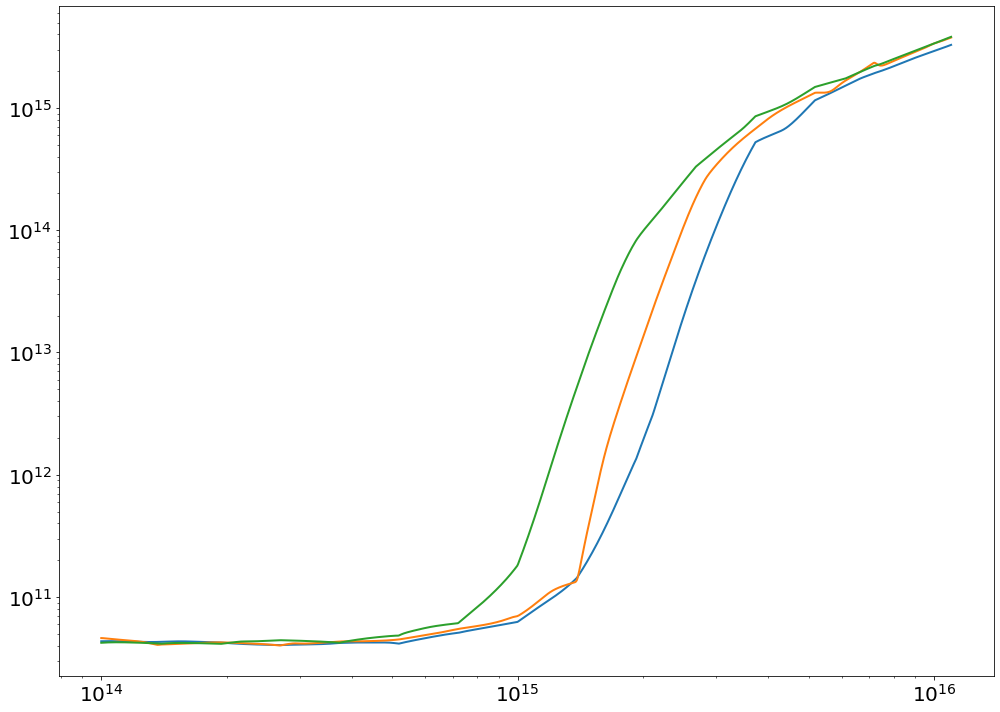

In [12]:
plt.loglog(X_300[:,0].flatten(), Y_300.flatten()*X_300[:,0].flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten()*X_500[:,0].flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten()*X_1000[:,0].flatten(), color = 'C2')

#plt.fill_between(X_300[:,0].flatten(), (Y_300-err_300)*X_300[:,0].flatten(), (Y_300+err_300)*X_300[:,0].flatten(), alpha = 0.2, color = 'C0')
#plt.fill_between(X_500[:,0].flatten(), (Y_500.flatten()-err_500)*X_500[:,0].flatten(), (Y_500.flatten()+err_500)*X_500[:,0].flatten(), alpha = 0.2, color = 'C1')
#plt.fill_between(X_1000[:,0].flatten(), (Y_1000.flatten()-err_1000)*X_1000[:,0].flatten(), (Y_1000.flatten()+err_1000)*X_1000[:,0].flatten(), alpha = 0.2, color = 'C2')

In [13]:
N = 100
I = np.geomspace(1e14, 1e16, N)
Ln = np.geomspace(300e-6, 1000e-6, N)
X = []

for i in range(N):
    for j in range(N):
        X.append([I[i], Ln[j]])
X = np.array(X)

In [14]:
output = gp.GP_predict(X)

In [33]:
I_plot, Ln_plot = np.meshgrid(I, Ln)

output = output.reshape(I_plot.shape).T
output.max()

0.3460437538748696

In [29]:
from matplotlib.colors import LogNorm
if output_type == 'T':
    plt.contourf(I_plot, Ln_plot, output, levels = np.linspace(4, 20, 1000), cmap=plt.cm.jet)
    plt.yscale('log')
    plt.xscale('log')
    plt.colorbar()

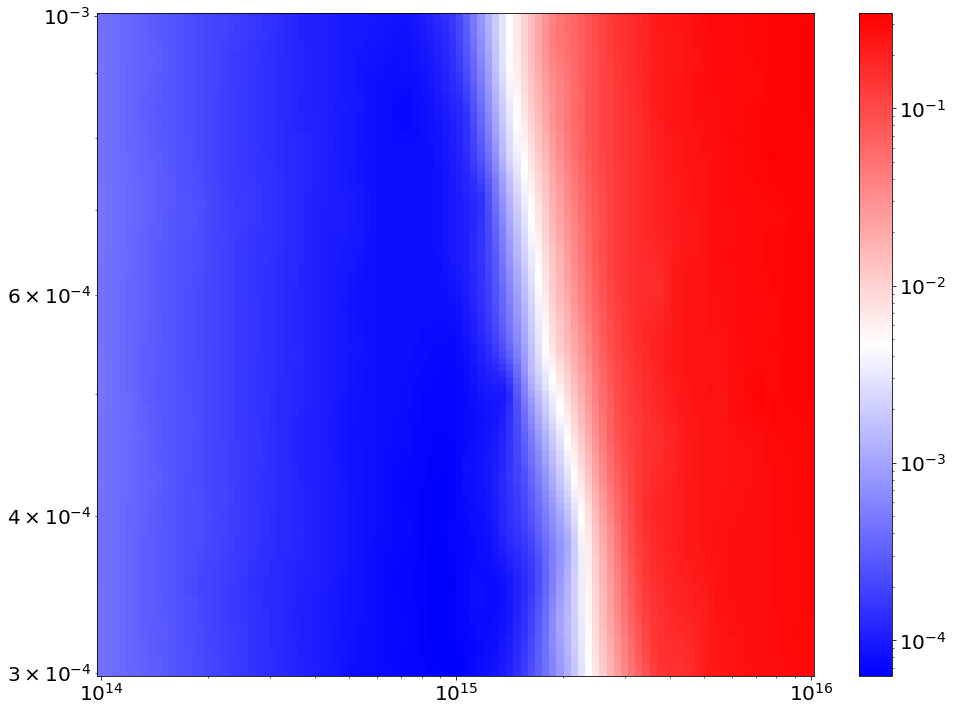

In [35]:
plt.pcolormesh(I_plot, Ln_plot, output, norm = LogNorm(vmin = output.min(), vmax = output.max()), cmap=plt.cm.bwr,  shading ='auto')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

In [76]:
I_thr = []
Ln_vals = []
for i in range(N):
    P = output[i,:]
    idx = np.where(np.abs(np.diff(P))/P.max()>5e-3)
    Ln_vals.append(Ln[i])
    I_thr.append(I[idx[0][0]])

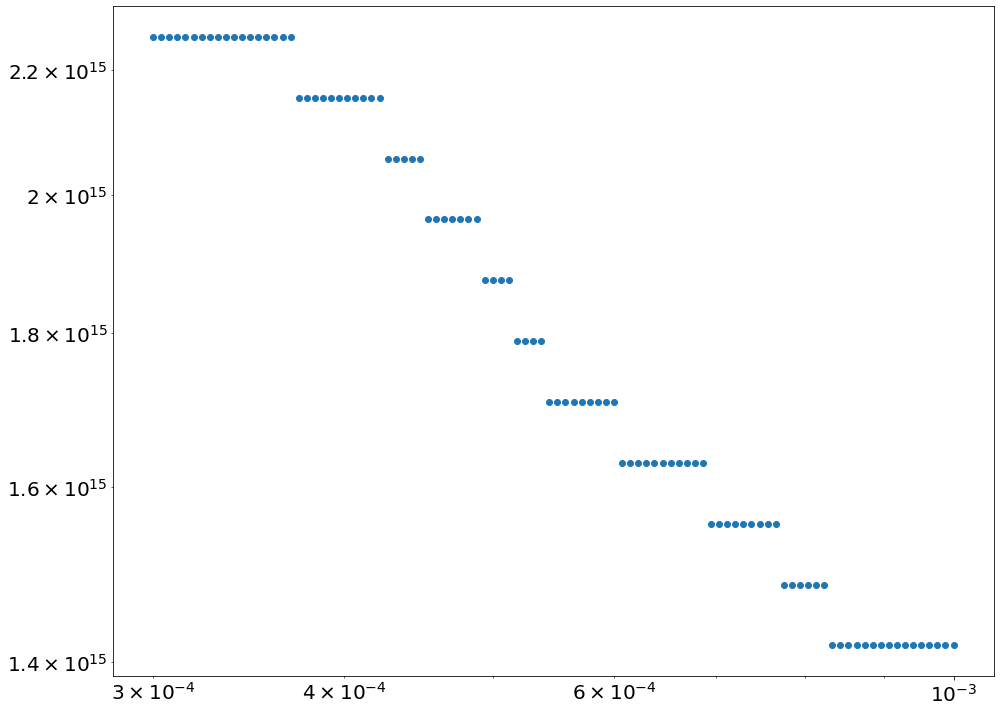

In [77]:
plt.loglog(Ln_vals, I_thr, 'o')

In [65]:
np.where(np.abs(np.diff(P))/P.max()>1e-3)

(array([64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
        81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
        98]),)

2.0349533822436965